In [8]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [23]:
def grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

def gaussian_blur(img, kernel_size):
    return cv2.GaussianBlur(img,(kernel_size, kernel_size),0)

def canny(img, low, high):
    return cv2.Canny(img, low, high)

def roi(img, vertices, color3=(255,255,255), color1=255):
    
    mask = np.zeros_like(img)
    if len(img.shape) > 2:
        color = color3
    else:
        color=color1
    cv2.fillPoly(mask, vertices, color)
    ROI_image = cv2.bitwise_and(img, mask)
    return ROI_image

def draw_lines(img, lines, color=[0,0,255], thickness=2):
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(img,(x1,y1),(x2,y2),color,thickness)
            
def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap): 
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    draw_lines(line_img, lines)

    return line_img

def weighted_img(img, initial_img, alpha=1, beta=1., lam=0.): 
    return cv2.addWeighted(initial_img, alpha, img, beta, lam)

def img_show(origin, transformation):
    #bgr->rgb
    origin = origin[:,:,::-1]
    transformation = transformation[:,:,::-1]
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=((10,10)))
    ax[0].set_title('origin image')
    ax[0].imshow(origin)
    ax[1].set_title('transformation image')
    ax[1].imshow(transformation)
    plt.show()

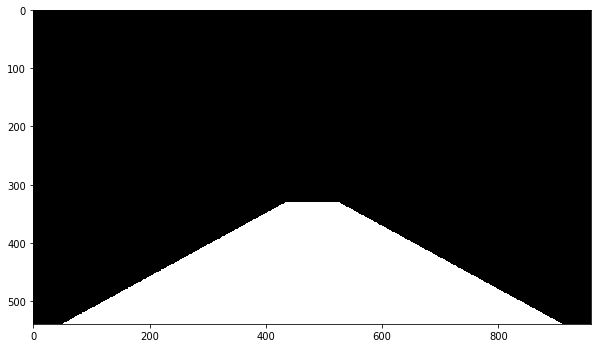

In [21]:
image = cv2.imread('../lane/lane.jpg')
height, width = image.shape[:2]
sten = np.zeros_like(image)
vertices = np.array([[(50,height),(width/2-45, height/2+60), (width/2+45, height/2+60), (width-50,height)]], dtype=np.int32)
cv2.fillPoly(sten,vertices,(255,255,255))
plt.figure(figsize=(10,10))
plt.imshow(sten, cmap= "gray")
plt.show()

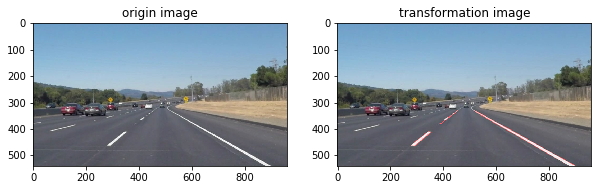

In [24]:
image = cv2.imread('../lane/lane.jpg')
height, width = image.shape[:2]
gray_img = grayscale(image)
blur_img = gaussian_blur(gray_img, 3)
canny_img = canny(blur_img, 70, 210)
vertices = np.array([[(50,height),(width/2-45, height/2+60), (width/2+45, height/2+60), (width-50,height)]], dtype=np.int32)
ROI_img = roi(canny_img, vertices)
hough_img = hough_lines(ROI_img, 1, np.pi/180, 30, 10, 20)
result = weighted_img(hough_img, image)
img_show(image, result)